#importing basic libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#reading dataset

In [ ]:
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
Wine=wine.values
wine.values

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#normalising the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm=MinMaxScaler()
norm


MinMaxScaler()

In [ ]:
wine_data=pd.DataFrame(norm.fit_transform(wine.iloc[:,1:]))

In [ ]:
wine_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


#converting into numpy array

In [ ]:
Wine=wine.values
Wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# creating covarience matrix for finding eigen values&eigen vectors

In [ ]:
cov=np.cov(wine_data)
cov

array([[ 0.04982313,  0.03791505,  0.02409622, ..., -0.02440992,
        -0.01721553, -0.02659822],
       [ 0.03791505,  0.04012642,  0.01943327, ..., -0.0274351 ,
        -0.02316429, -0.03050326],
       [ 0.02409622,  0.01943327,  0.02568723, ..., -0.02190613,
        -0.01655483, -0.01845752],
       ...,
       [-0.02440992, -0.0274351 , -0.02190613, ...,  0.05441841,
         0.04510959,  0.05416722],
       [-0.01721553, -0.02316429, -0.01655483, ...,  0.04510959,
         0.04901647,  0.05164954],
       [-0.02659822, -0.03050326, -0.01845752, ...,  0.05416722,
         0.05164954,  0.08271047]])

In [ ]:
eig_values,eig_vectors=np.linalg.eig(cov)


In [ ]:
eig_values

array([ 2.88676721e+00+0.00000000e+00j,  1.55172839e+00+0.00000000e+00j,
        1.05671810e+00+0.00000000e+00j,  5.98357796e-01+0.00000000e+00j,
        4.41336653e-01+0.00000000e+00j,  3.77031455e-01+0.00000000e+00j,
        2.28119140e-01+0.00000000e+00j,  2.00942636e-01+0.00000000e+00j,
        1.82257282e-01+0.00000000e+00j,  1.65525902e-01+0.00000000e+00j,
        1.04676853e-01+0.00000000e+00j,  8.07808091e-02+0.00000000e+00j,
        1.18177355e-16+1.47966428e-16j,  1.18177355e-16-1.47966428e-16j,
       -1.54291377e-16+1.03429537e-17j, -1.54291377e-16-1.03429537e-17j,
        1.17722771e-16+3.89214344e-17j,  1.17722771e-16-3.89214344e-17j,
        1.22286519e-16+0.00000000e+00j,  6.27143820e-17+1.01360660e-16j,
        6.27143820e-17-1.01360660e-16j,  1.03187766e-17+1.12804665e-16j,
        1.03187766e-17-1.12804665e-16j, -6.09709547e-17+9.18435563e-17j,
       -6.09709547e-17-9.18435563e-17j, -8.87617004e-17+6.47271784e-17j,
       -8.87617004e-17-6.47271784e-17j, -1.08702439

In [ ]:
eig_vectors

array([[ 1.00665792e-01+0.j, -1.31048285e-02+0.j,  9.77074989e-02+0.j,
        ...,  3.03410769e-02+0.j, -2.42913195e-02+0.j,
         1.76530156e-02+0.j],
       [ 9.44534140e-02+0.j, -2.68416481e-03+0.j,  7.17377616e-02+0.j,
        ...,  5.79905719e-03+0.j,  1.53204965e-04+0.j,
         4.26731185e-03+0.j],
       [ 6.90235119e-02+0.j, -1.84836555e-02+0.j,  4.46188749e-02+0.j,
        ...,  1.33085590e-02+0.j, -9.64975141e-04+0.j,
        -7.03155324e-03+0.j],
       ...,
       [-1.20028164e-01+0.j,  5.11508137e-02+0.j,  7.18558357e-02+0.j,
        ..., -7.51580367e-02+0.j, -7.46442022e-02+0.j,
         1.31255804e-01+0.j],
       [-1.04556872e-01+0.j,  8.07779045e-03+0.j,  8.67113046e-02+0.j,
        ..., -1.67777561e-01+0.j,  6.55509814e-03+0.j,
         8.81587750e-02+0.j],
       [-1.38811087e-01+0.j, -5.94634231e-02+0.j,  1.27225786e-01+0.j,
        ..., -8.78256780e-02+0.j, -4.64099808e-02+0.j,
         1.00187122e-01+0.j]])

#building PCA

In [ ]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine_data)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [ ]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

# finding varinence in each component

In [ ]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

#cumilative variance

In [ ]:
cum=np.cumsum(np.round(var,decimals=5)*100)
cum

array([40.749, 59.719, 68.281, 75.708, 81.273, 85.932, 89.596, 92.005,
       94.279, 96.53 , 97.911, 99.184, 99.999])

#visualisation for cumilative variance

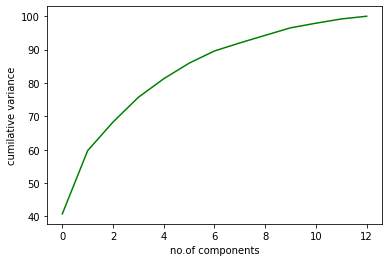

In [ ]:
plt.plot(cum,color='green')
plt.xlabel('no.of components')
plt.ylabel('cumilative variance')
plt.show()

In [ ]:
pca_values[:,0:7]

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02, ...,
        -2.65795809e-02, -7.43644860e-02,  6.51717951e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01, ...,
        -2.38634447e-01, -7.18773018e-02,  6.85560138e-04],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01, ...,
         4.50448819e-02,  8.71163881e-02,  1.25605249e-01],
       ...,
       [ 6.26312888e-01, -5.46857013e-01, -3.04947552e-02, ...,
         7.37382032e-02,  3.17027708e-02,  1.86333922e-01],
       [ 5.72991102e-01, -4.25516087e-01, -9.45367174e-02, ...,
         1.50559179e-01,  1.12254009e-01,  1.48922360e-01],
       [ 7.01763997e-01, -5.13504983e-01,  2.93909961e-01, ...,
        -2.51381748e-02,  9.06167004e-02, -1.13451595e-01]])

In [ ]:
wine_final_a=pd.concat([pd.DataFrame(pca_values[:,0:7],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7']),wine[['Type']]],axis=1)
wine_final_a

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1
...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3


#KMeans cluster

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wine_final_a

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1
...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3


#normalising data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm2=MinMaxScaler()
norm2

MinMaxScaler()

In [ ]:
wine_data_1=pd.DataFrame(norm2.fit_transform(wine_final_a.iloc[:,0:7]))
wine_data_1

,0,1,2,3,4,5,6
0,0.073893,0.275583,0.512299,0.502523,0.349548,0.310425,0.396504
1,0.200316,0.447330,0.330847,0.557414,0.116366,0.313096,0.334028
2,0.179644,0.320567,0.614843,0.477067,0.428308,0.483814,0.455053
3,0.008038,0.045262,0.546267,0.501622,0.373492,0.478307,0.267078
4,0.361619,0.411737,0.676816,0.401465,0.495090,0.264871,0.388769
...,...,...,...,...,...,...,...
173,0.899650,0.121871,0.622674,0.622115,0.057938,0.300258,0.420743
174,0.809567,0.208694,0.547745,0.556825,0.434104,0.363113,0.379881
175,0.835000,0.069191,0.479778,0.640002,0.459860,0.424314,0.513889
176,0.804547,0.154472,0.441625,0.370492,0.544335,0.510806,0.477644


#elbow curve

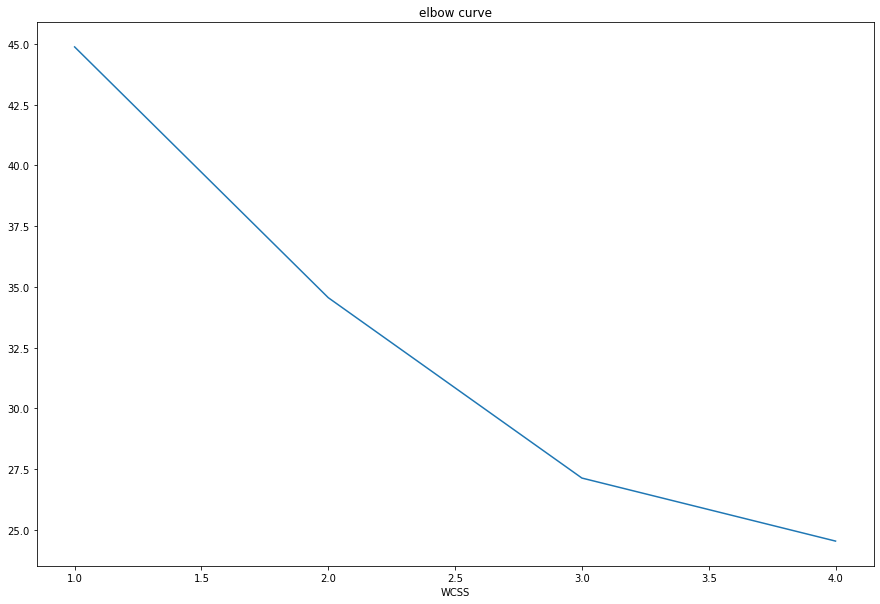

In [ ]:
fig=plt.figure(figsize=(15,10))
WCSS=[]
for i in range(1,5):
  wine_y=KMeans(n_clusters=i)
  wine_y.fit(wine_data_1)
  WCSS.append(wine_y.inertia_)
plt.plot(range(1,5),WCSS)
plt.title('elbow curve')
plt.xlabel('WCSS')
plt.show() 


In [ ]:
wine_kmeans=KMeans(n_clusters=3).fit(wine_data)
wine_kmeans

KMeans(n_clusters=3)

In [ ]:
wine_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
wine_kmeans_labels=pd.Series(wine_kmeans.labels_)
wine_kmeans_labels

0      2
1      2
2      2
3      2
4      2
      ..
173    1
174    1
175    1
176    1
177    1
Length: 178, dtype: int32

In [ ]:
wine_final=pd.DataFrame(wine_final_a)
wine_final

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,2
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,2
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,2
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,2
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,2
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,1
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,1
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,1
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,1


In [ ]:
wine_final['k_cluster']=wine_kmeans_labels
wine_final


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,2
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,2
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,2
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,2
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,2
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,1
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,1
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,1
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,1


In [ ]:
wine_final['k_cluster']=wine_kmeans_labels
wine_final

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,2
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,2
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,2
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,2
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,2
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,1
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,1
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,1
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,1


In [ ]:
wine_a=wine_final[(wine_final.k_cluster==0)]
wine_a.count()

pc1          63
pc2          63
pc3          63
pc4          63
pc5          63
pc6          63
pc7          63
Type         63
k_cluster    63
dtype: int64

In [ ]:
wine_b=wine_final[(wine_final.k_cluster==1)]
wine_b.count()

pc1          55
pc2          55
pc3          55
pc4          55
pc5          55
pc6          55
pc7          55
Type         55
k_cluster    55
dtype: int64

In [ ]:
wine_c=wine_final[(wine_final.k_cluster==2)]
wine_c.count()

pc1          60
pc2          60
pc3          60
pc4          60
pc5          60
pc6          60
pc7          60
Type         60
k_cluster    60
dtype: int64

#visualisation

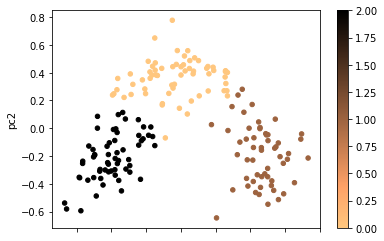

In [ ]:
wine_final.plot(x='pc1',y='pc2',c=wine_final.k_cluster,kind='scatter',cmap=plt.cm.copper_r)

#Hierarchical cluster

In [ ]:
wine_data_a = wine_final_a.iloc[:,0:8]
wine_data_a

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1
...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3


In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

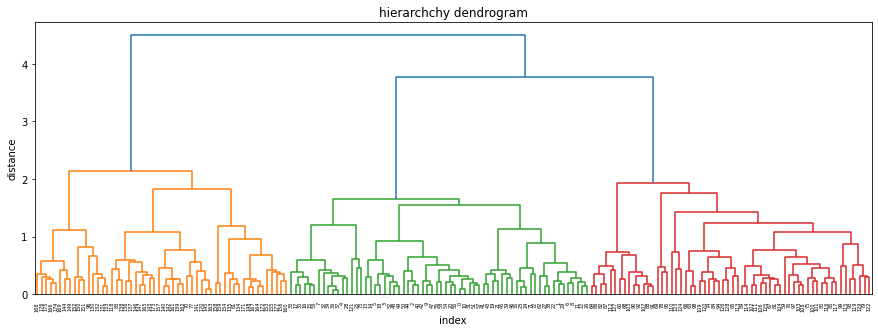

In [ ]:
z=linkage(wine_data_1,method='ward',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('hierarchchy dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward').fit(wine_data_1)

In [ ]:
cluster_labels=pd.Series(agg.labels_)
cluster_labels

0      2
1      2
2      2
3      2
4      2
      ..
173    5
174    3
175    3
176    3
177    1
Length: 178, dtype: int64

In [ ]:
wine_data_a['cluster']=cluster_labels
wine_data_a

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,2
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,2
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,2
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,2
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,2
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,5
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,3


In [ ]:

wine_data_a.iloc[:,0:7].groupby(wine_data_a.cluster).mean()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
cluster,,,,,,,
0,-0.109031,0.374859,0.005228,0.090172,0.004137,0.075340,0.019931
1,0.603024,-0.290042,-0.033585,-0.088229,0.003496,0.221277,-0.052464
2,-0.468578,-0.184079,0.006046,-0.028321,-0.026047,-0.047941,-0.016107
3,0.499074,-0.253535,-0.081945,0.193896,0.273654,-0.061646,0.004389
4,0.264832,0.356653,0.026820,-0.290985,-0.017909,-0.044517,0.015650
5,0.621057,-0.079926,0.038436,0.002169,-0.123042,-0.105830,0.030188


#visualisation

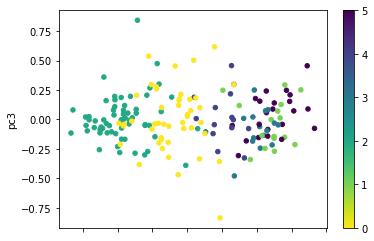

In [ ]:
wine_data_a.plot(x='pc1',y='pc3',c=wine_data_a.cluster,kind='scatter',cmap=plt.cm.viridis_r)